In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

__Example 21.3.5__ Construct a CUSUM Control Chart using the data in the following Table

In [2]:
data = pd.read_excel('table2121.xlsx')
data.head() # preview

,Obs. 1,Obs. 2,Obs. 3,Obs. 4,X bar,Z bar,Si
0,19.35,20.05,18.92,15.70,18.5050,-1.4950,-1.4950
1,17.50,19.37,17.03,19.35,18.3125,-1.6875,-3.1825
2,22.99,18.61,18.35,17.77,19.4300,-0.5700,-3.7525
3,22.83,19.56,21.14,23.50,21.7575,1.7575,-1.9950
4,18.70,21.26,19.71,19.07,19.6850,-0.3150,-2.3100


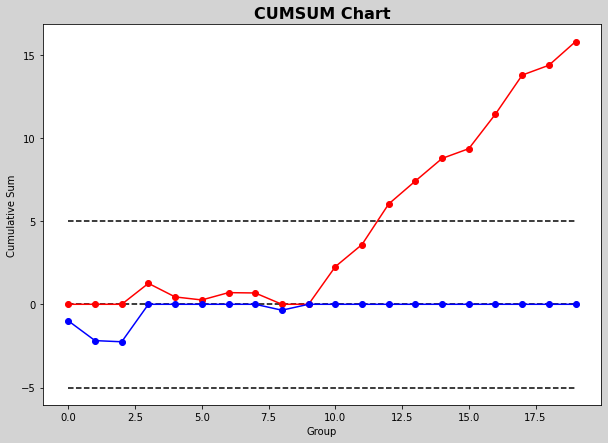

In [3]:
target = 20

k = 0.5 

cplus = []  # values
cminus = []  # values
x = data['X bar']

i, j = 0, 0
for l in range(len(data)):
    cplus.append(max([0, x[l] - (target + k) + i]))
    cminus.append(min([0, x[l] - (target - k) + j]))
    i, j = cplus[-1], cminus[-1]

plt.figure(figsize=(10, 7), facecolor='lightgray')
plt.title('CUMSUM Chart', fontsize=16, fontweight='bold')
plt.xlabel('Group')
plt.ylabel('Cumulative Sum')
plt.plot(cplus, color='red', marker='o')
plt.plot(cminus, color='blue', marker='o')
plt.hlines(y=0, xmin=0, xmax=19, linestyles='dashed', colors='black')
plt.hlines(y=5, xmin=0, xmax=19, linestyles='dashed', colors='black')
plt.hlines(y=-5, xmin=0, xmax=19, linestyles='dashed', colors='black')
plt.show()

__Example 21.5.1__ (Auto parts) Consider the data in the following Table on the manufacturing process of auto parts in Example 21.2.1 (see Textbook). Design an EWMA control chart for these data with λ = 0.20, L = 2.962, $µ_0$ = 20, σ = 2.

In [4]:
data = pd.read_excel('table2133.xlsx')
data.head()  # preview

,Xi,Zi,Si plus,Si minus
0,19.35,-0.33,0.0,0.00
1,20.05,0.03,0.0,0.00
2,18.92,-0.54,0.0,-0.04
3,15.70,-2.15,0.0,-1.69
4,17.50,-1.25,0.0,-2.44


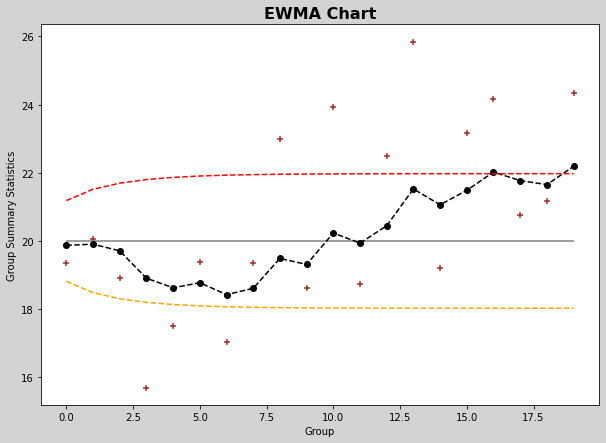

In [5]:
target = 20  # mean, given
weight = 0.2  # the lambda
L = 2.962  # the multiple parameter
std = 2  # standard deviation

ewma = []
i = target
for x in data['Xi']:
    ewma.append(weight * x + (1 - weight) * i)
    i = ewma[-1]

lcl, ucl = [], []  # lower and upper limits
for i in range(1, len(data) + 1):
    lcl.append(target - L * (std) * np.sqrt((weight / (2 - weight)) * (1 - (1 - weight)**(2 * i))))
    ucl.append(target + L * (std) * np.sqrt((weight / (2 - weight)) * (1 - (1 - weight)**(2 * i))))

plt.figure(figsize=(10, 7), facecolor='lightgray')
plt.title('EWMA Chart', fontsize=16, fontweight='bold')
plt.ylabel('Group Summary Statistics')
plt.xlabel('Group')
plt.plot(ewma, marker='o', color='black', linestyle='--')
plt.plot(lcl, linestyle='--', color='orange')
plt.plot(ucl, linestyle='--', color='red')
plt.hlines(y=target, xmin=0, xmax=19, colors='gray')
plt.scatter(data.index, data['Xi'], marker='+', c='brown')
plt.show()